In [1]:
% matplotlib inline
import tables
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import os

In [2]:
import seaborn as sns

/home/jkager/.local/lib/python2.7/site-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


In [3]:
ENERGY,AZIMUTH,ZENITH,MUEX = 0,1,2,3

# visualize input datasets #
- how are the energies disrtibuted inside files and across files (plot every of the 13 files)
- how are angles distributed?

In [17]:
data_path = "/data/user/tglauch/ML_Reco/training_data/"
files = sorted([os.path.join(data_path, f) for f in os.listdir(data_path) if os.path.isfile(os.path.join(data_path, f))])

In [18]:
openedfiles = [tables.open_file(f) for f in files]
openedfiles[1]

File(filename=/data/user/tglauch/ML_Reco/training_data/11029_01000-01999.h5, title='Events for training the NN', mode='r', root_uep='/', filters=Filters(complevel=9, complib='zlib', shuffle=True, fletcher32=False, least_significant_digit=None))
/ (RootGroup) 'Events for training the NN'
/charge (EArray(982552, 20, 10, 60, 1), shuffle, zlib(9)) 'Charge Distribution'
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (1, 20, 10, 60, 1)
/reco_vals (EArray(982552, 6), shuffle, zlib(9)) 'Energy,Azimuth,Zenith,MuEx,depositedE,ow'
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (1365, 6)
/time (EArray(982552, 20, 10, 60, 1), shuffle, zlib(9)) 'Timestamp Distribution'
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (1, 20, 10, 60, 1)

In [6]:
openedfiles[0].filename

'/data/user/jkager/NN_Reco/training_data/11029_00000-00999.h5'

## Energy ##

In [100]:
energies = openedfiles[0].root.reco_vals[:,ENERGY]

In [98]:
print stats.describe(energies)

DescribeResult(nobs=970452, minmax=(100.00182379787898, 97390290.903802931), mean=13113.343871989835, variance=148336854403.08823, skewness=125.17614567204714, kurtosis=21155.1168010658)


In [34]:
hist = np.histogram(np.log10(energies))

(array([  1.60581000e+05,   2.24691000e+05,   1.91562000e+05,
          1.37625000e+05,   9.14220000e+04,   6.02550000e+04,
          4.01650000e+04,   2.64560000e+04,   1.61370000e+04,
          9.47600000e+03,   5.48600000e+03,   2.98900000e+03,
          1.69600000e+03,   9.06000000e+02,   4.98000000e+02,
          2.69000000e+02,   1.33000000e+02,   6.10000000e+01,
          2.70000000e+01,   1.70000000e+01]),
 array([ 2.00000792,  2.29943331,  2.59885869,  2.89828408,  3.19770947,
         3.49713486,  3.79656024,  4.09598563,  4.39541102,  4.6948364 ,
         4.99426179,  5.29368718,  5.59311257,  5.89253795,  6.19196334,
         6.49138873,  6.79081411,  7.0902395 ,  7.38966489,  7.68909028,
         7.98851566]),
 <a list of 20 Patch objects>)

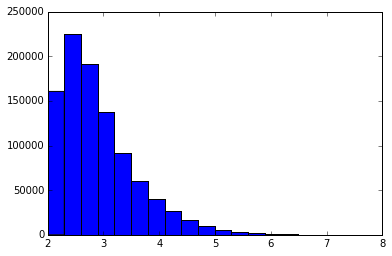

In [95]:
plt.figure()
plt.hist(np.log10(energies),20)

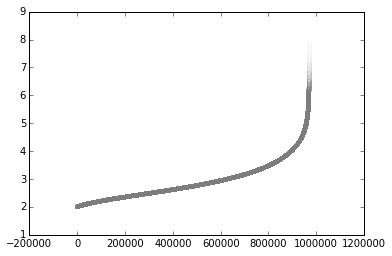

In [85]:
plt.figure() # to close the last plot
plt.scatter(xrange(len(energies)), np.sort(np.log10(energies)), marker='o', alpha=0.01, facecolors='none')

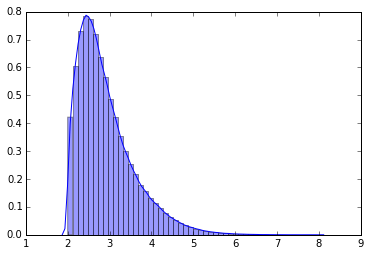

In [92]:
sns.distplot(np.log10(energies))

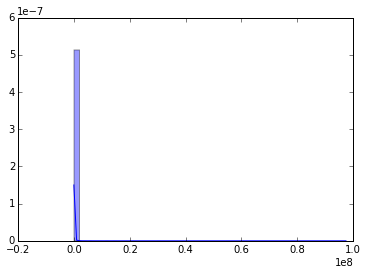

In [102]:
sns.distplot(energies)

/data/user/jkager/NN_Reco/training_data/11029_00000-00999.h5
/data/user/jkager/NN_Reco/training_data/11029_01000-01999.h5
/data/user/jkager/NN_Reco/training_data/11029_02000-02999.h5
/data/user/jkager/NN_Reco/training_data/11029_03000-03999.h5
/data/user/jkager/NN_Reco/training_data/11029_04000-04999.h5
/data/user/jkager/NN_Reco/training_data/11029_05000-05999.h5


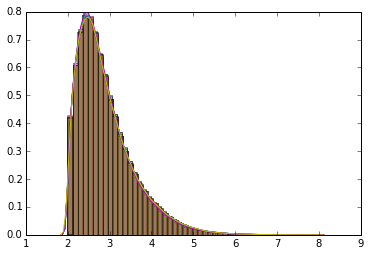

In [105]:
for h5 in filter(lambda f: '11029' in f.filename, openedfiles):
    e = h5.root.reco_vals[:,ENERGY]
    print h5.filename
    sns.distplot(np.log10(e))

/data/user/jkager/NN_Reco/training_data/11029_00000-00999.h5
/data/user/jkager/NN_Reco/training_data/11069_00000-00999.h5


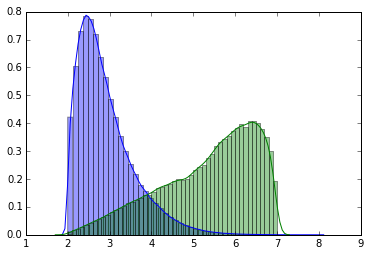

In [106]:
for h5 in [filter(lambda f: '11029' in f.filename, openedfiles)[0], filter(lambda f: '11069' in f.filename, openedfiles)[0]]:
    e = h5.root.reco_vals[:,ENERGY]
    print h5.filename
    sns.distplot(np.log10(e))

## Zenith ##

In [7]:
zeniths={'11029' : map(lambda x: x.root.reco_vals[:,ZENITH], filter(lambda f: '11029' in f.filename, openedfiles)),
         '11069' : map(lambda x: x.root.reco_vals[:,ZENITH], filter(lambda f: '11069' in f.filename, openedfiles))}

In [8]:
zeniths['11029-fn'] = [f.filename.split('/')[-1] for f in filter(lambda f: '11029' in f.filename, openedfiles)]
zeniths['11069-fn'] = [f.filename.split('/')[-1] for f in filter(lambda f: '11069' in f.filename, openedfiles)]

/data/user/jkager/NN_Reco/training_data/11029_00000-00999.h5
/data/user/jkager/NN_Reco/training_data/11029_01000-01999.h5


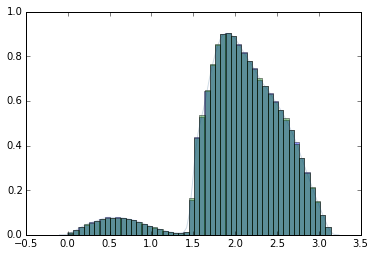

In [114]:
for h5 in filter(lambda f: '11029' in f.filename, openedfiles[0:2]):
    e = h5.root.reco_vals[:,ZENITH]
    print h5.filename
    sns.distplot(e,kde_kws={'alpha':0.1})

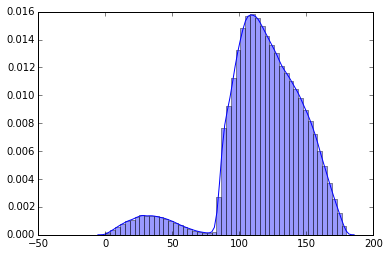

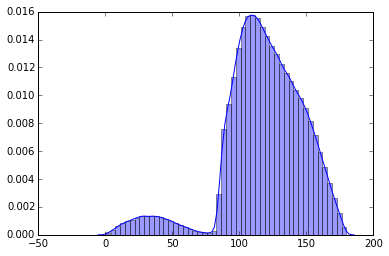

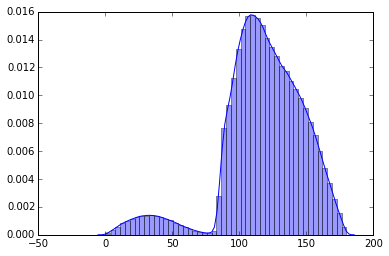

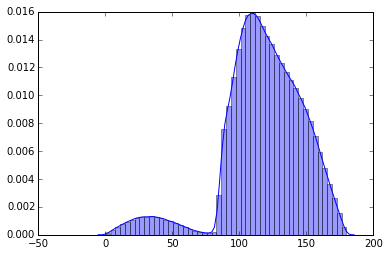

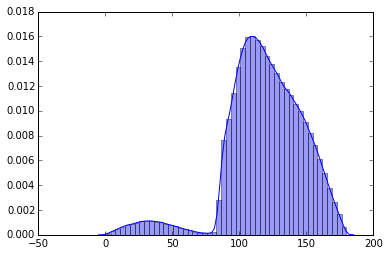

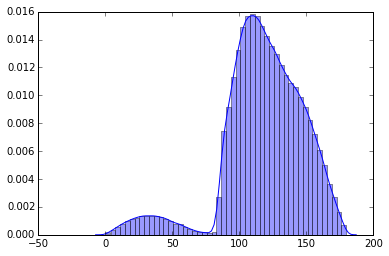

In [9]:
zlist = []
for i, zeniths_in_file in enumerate(zeniths['11029']):
    zlist.extend(zeniths_in_file)
    plt.figure()
    sns.distplot(zeniths_in_file * 180 / np.pi,label=zeniths['11029-fn'][i])

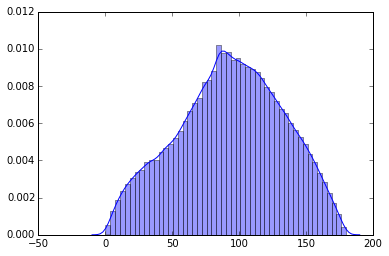

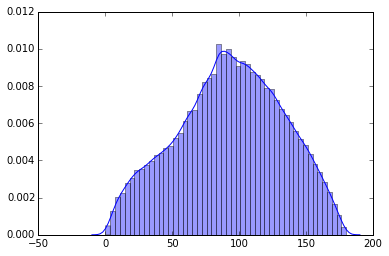

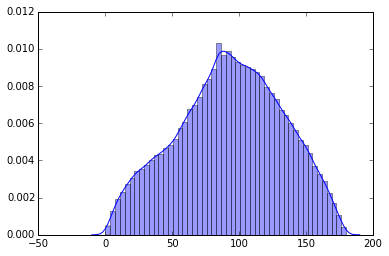

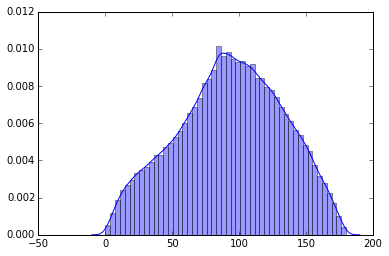

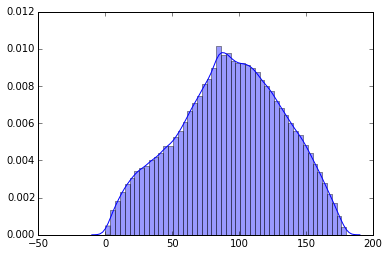

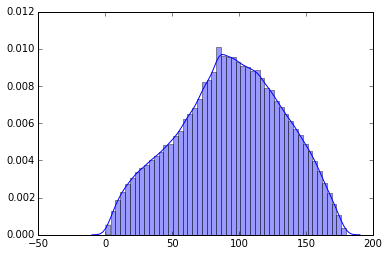

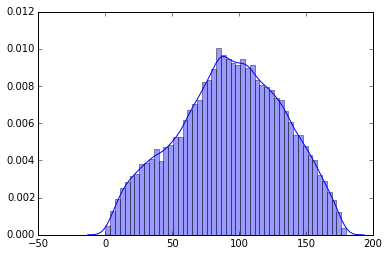

In [17]:
zlist=np.array([])
for i, zeniths_in_file in enumerate(zeniths['11069']):
    zlist = np.concatenate((zlist,zeniths_in_file))
    plt.figure()
    sns.distplot(zeniths_in_file * 180 / np.pi,label=zeniths['11069-fn'][i])
    #print float(np.sum(zeniths_in_file > np.pi/2)) / len(zeniths_in_file)

In [30]:
(zlist > np.pi/2).sum() / float(zlist.shape[0])

0.54146940437691959